## RAP MUSIC GENERATION

<u><b> Step 1 : Reading the rap song file </b> </u>

In [119]:
# read the rap text file with all the raps

rap_song_file = open(r'./All_Rap_lyrics.txt','r', encoding='utf-8').read()
rap_song_file = rap_song_file.lower() # converting all the text to lower case

<u><b>  Step 2 : Building bars from lyrics </b> </u>

#### Terminologies:
##### What is a bar in rap song:
- Usually one line of lyrics is one count, and there are 4 counts in a bar.  
- There are  16 bars in a verse in most rap songs.<br>

##### An example of bar using a lyrics below:
Lights slow motion, steppin' out the Phantom ===> 1 bar <br>
All eyes on me, peekin' and glancin' ===> 2nd bar <br>
Leanin' on the wall, with b-boys dancin' ===> 3rd bar <br>
Ears, neck, and wrists lookin' like the king's ransom ==> 4 bars <br>

###### Just to note  that the verse length may vary across lyrics but we have taken the verse length to equal to 4 bars

In [120]:
# splitting out rap songs collection line by line

bars = rap_song_file.split('\n') 

<b> <u> Step 3 : Cleaning the bars </b> </u>
- Converting characters to the lowercase
- Removing empty string
- Removing special characters
- Removing characters inside [ ] as these are not relevant to the bars we are generating
- Stripping the end charcters (if its a space)

In [121]:
print('Length of the bars : ', len(bars))

Length of the bars :  22839


In [122]:
# removing the charcacters inside [] and converting the bars to lowercase

import re
print('There are characters inside [ ], these are of no significance. For example : \n\n' , bars[80:90])
new_bars = []
for bar in bars:
    bar = re.sub(r'\[.*?\]', '', bar)
    new_bars.append(bar.lower())
bars = new_bars


There are characters inside [ ], these are of no significance. For example : 

 ["but when i hear the beat i'm tempted to make another attempt at it...", "i'm infinite", '', "'95, '96 ('96)", 'and on and on and on (and on and on)', '', '', '', '[old school hip-hop beat tune plays in the background like a radio station]', '']


In [123]:
# We need to remove the empty_strings in bar

print(bars[80:90]) # we see that there are some empty strings in the file
bars = list(filter(None, bars)) ## filter out the strings with None

["but when i hear the beat i'm tempted to make another attempt at it...", "i'm infinite", '', "'95, '96 ('96)", 'and on and on and on (and on and on)', '', '', '', '', '']


In [124]:
bars[80:90] # empty string have been removed

['this is mc proof',
 'and dj head',
 "checkin' in on w.e.g.o.",
 "you know what i'm sayin'?",
 'ay yo we got the number one requested song, of the day coming up next.',
 "it's a local thing wants retilin'",
 'it goes by the name of eminem',
 'and it\'s called "it\'s ok"',
 ' check it out, ',
 ' hey kyu!']

In [125]:
# Subsituting the special characters with empty space, stripping on the end of the strings

import re
new_bars = []
for bar in bars:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars = new_bars

In [126]:
bars[80:90]# special characters have been removed

['this is mc proof',
 'and dj head',
 'checkin in on wego',
 'you know what im sayin',
 'ay yo we got the number one requested song of the day coming up next',
 'its a local thing wants retilin',
 'it goes by the name of eminem',
 'and its called its ok',
 'check it out',
 'hey kyu']

In [127]:
print('Length of the bars : ', len(bars))

Length of the bars :  17505


In [128]:
with open('./cleaned_Rap.txt.txt', 'w') as f:
    for item in bars:
        f.write("%s\n" % item)

<b> <u> Step 4 : Visualizing the dataset </b> </u>

In [129]:
# creating a word cloud of the most used words in a rhyme

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [130]:
# combining all the bars into a single string to feed into the wordcloud generate function

str_bars = ''
str_bars = ' '.join(bars)
wordcloud = WordCloud().generate(str_bars)

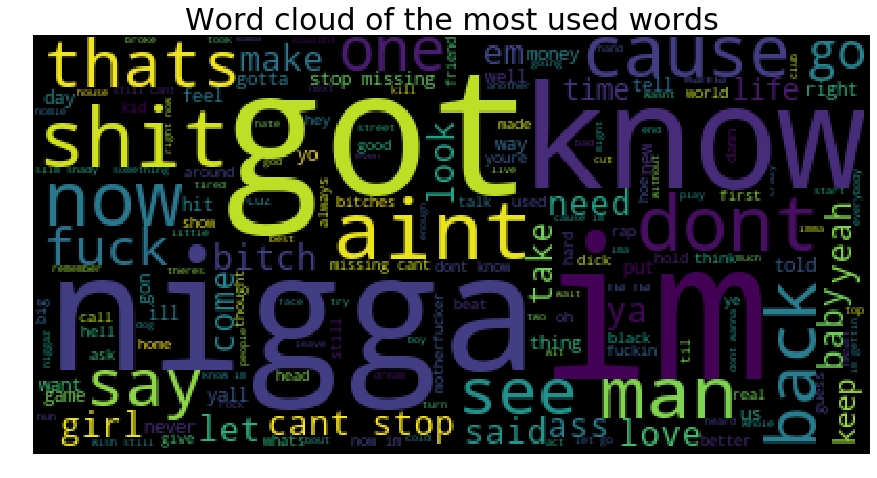

In [131]:
# forming the word cloud of the most used words in all the raps across


plt.figure(figsize=(15,100))
plt.title('Word cloud of the most used words', fontsize=30)
plt.imshow(wordcloud)
plt.axis("off") # added to not display the x and y axis
plt.show()

Text(0, 0.5, 'Number of songs')

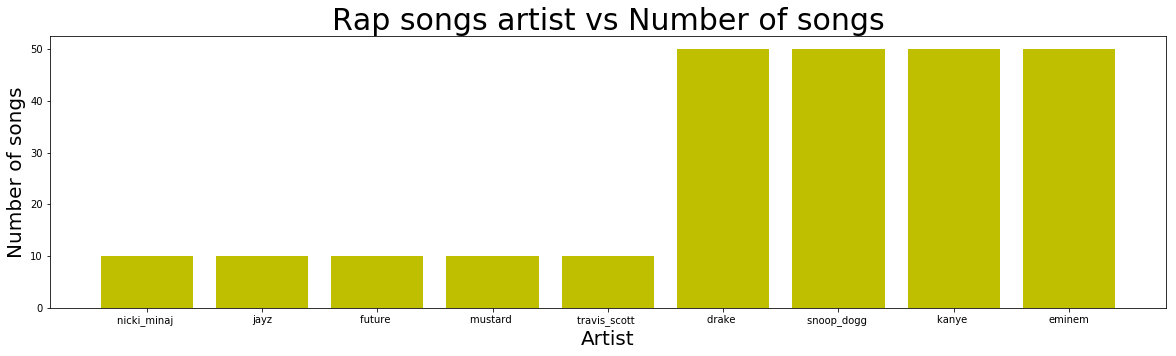

In [132]:
# visualizing artist and number of songs considered

import pandas as pd
df_artists = pd.read_excel(r'Rap_songs_artist.xlsx')

plt.figure(figsize=(20,5))
plt.title('Rap songs artist vs Number of songs', fontsize=30)
plt.bar(df_artists['Artist'],df_artists['Songs'], color= 'y')
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Number of songs', fontsize=20)

In [133]:
# counting the number and also count of unique words in the corpus

from nltk.tokenize import word_tokenize
words_count = word_tokenize(str_bars)

In [134]:
print('All the words in the bars : ' , len(words_count))
print('All the unique words in the bars : ' , len(set(words_count)))
print('The total number of bar : ', len(bars))

All the words in the bars :  145597
All the unique words in the bars :  10626
The total number of bar :  17505


<b> <u> Step 5 : Building the list of rhymes </b> </u>

In [135]:
import pronouncing #using this library to find the list of rhyming words

<b> Function : rhyming_list_all </b> <br>

- Firstly we take out the last word from every bar <br>
<br>
- pronouncing.rhymes(last_word) :  It is used to give the set of rhyming words with the last word. 
<br> For example: pronouncing.rhymes('love') will give ['above', 'belove', 'deneuve', 'deneuve', 'dove', 'glove', 'gov', 'labov', 'labove', "o'glove", 'of', 'shove', 'thereof','vanhove'] <br>
<br>
- Then we consider the last 2 characters in every rhyming word and see that which 2 charcater are the most repeated. 
<br>
- After this we assign these words rhyming_list_final in reveresed order (reversing with arrange the words with the same sound together) <br>
<br>

In [136]:
def rhyming_list_all(bars):
    rhyme_list_all = []
    rhyming_list_final = []
    for bar in bars:
        # taking the last word in each bar
        last_word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
        # finding the rhyming word for 'last_word'
        #print(last_word)
        rhyming_words = pronouncing.rhymes(last_word)
        #rhyming_words = [x.encode('UTF8') for x in rhyming_words]
        #print(rhyming_words)
        rhyming_words_ending = []
        for rhyming_word in rhyming_words:
            rhyming_words_ending.append(rhyming_word[-2:]) # this will pull the last 2 characters from each rhyming word
        #print(rhyming_words_ending)
        # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
        # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
        try:
            rhyming_words_ending_most_common = max(set(rhyming_words_ending), key = rhyming_words_ending.count)
        except Exception:
            rhyming_words_ending_most_common = last_word[-2:]
            #print(rhyming_words_ending_most_common)
        rhyme_list_all.append(rhyming_words_ending_most_common)
        #print(rhyme_list_all)
    # now taking the set of the list to get only unique last 2 characters
    #print('for loop ended')
    rhyme_list_all = list(set(rhyme_list_all))
    reverse_list = [x[::-1] for x in rhyme_list_all] #  using slicing syntax to reverse the letters[start,stop,step],
    #print(reverse_list)
    reverse_list = sorted(reverse_list)# sorting the characters
    #print(reverse_list)
    # now we will reverse the string again : this is done so that the words with the similar sounds can be taken in order
    rhyming_list_final =  [x[::-1] for x in reverse_list]
    return rhyming_list_final

In [137]:
rhyming_list_final = rhyming_list_all(bars) # contain the list of all common rhyming words (last 2 characters) used in the lyrics across all bars

In [138]:
print(len(rhyming_list_final)) # lenth of the common rhyming words used in the lyrics across all bars
print(rhyming_list_final)

285
['', "s'", 'a', 'aa', 'ba', 'ca', 'da', 'ea', 'ga', 'ha', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'pa', 'ra', 'sa', 'ta', 'ua', 'va', 'ya', 'za', 'ab', 'eb', 'ib', 'ob', 'rb', 'ub', 'ac', 'bc', 'fc', 'gc', 'ic', 'mc', 'nc', 'oc', 'ad', 'ed', 'id', 'ld', 'nd', 'od', 'rd', 'ud', 'vd', 'be', 'ce', 'de', 'ee', 'fe', 'ge', 'he', 'ie', 'ke', 'le', 'me', 'ne', 'oe', 'pe', 're', 'se', 'te', 'ue', 've', 'ye', 'ze', 'af', 'ef', 'ff', 'if', 'lf', 'of', 'tf', 'ag', 'bg', 'eg', 'gg', 'ig', 'ng', 'og', 'pg', 'rg', 'ug', 'wg', 'ah', 'ch', 'eh', 'gh', 'hh', 'nh', 'oh', 'ph', 'sh', 'th', 'uh', 'wh', 'ai', 'ci', 'gi', 'hi', 'ii', 'ki', 'li', 'mi', 'ni', 'oi', 'pi', 'ri', 'si', 'ti', 'zi', 'pj', 'tj', 'ak', 'ck', 'ek', 'ik', 'kk', 'lk', 'nk', 'ok', 'rk', 'sk', 'al', 'el', 'hl', 'il', 'll', 'ol', 'rl', 'tl', 'ul', 'wl', 'xl', 'am', 'bm', 'em', 'im', 'lm', 'mm', 'om', 'rm', 'sm', 'um', 'an', 'en', 'gn', 'in', 'mn', 'nn', 'on', 'rn', 'un', 'wn', 'yn', 'ao', 'co', 'do', 'eo', 'fo', 'go', 'io', 'jo', 'ko', 'l

### What is a syllables:
- A syllable is a single, unbroken sound of a spoken (or written) word. Syllables usually contain a vowel and accompanying consonants <br>  
- EXAMPLE: Water has two syllables (wa / ter), Computer has three syllables (com / pu / ter)<br>

### why do we need syllables in rap song?:
- Counting syllables is an excellent skill <br>
- Important part of the structure of your rhymes is syllable structure<br>
- The syllables in each line will create a beat in your rap<br>
- Generally, by drawing out a line with too many syllables, or making a line too short with too few syllables, you can disrupt the beat of your rap<br>
- Avoid this by trying to balance rhyming lines to have the same number of beats<br>

### To note: 
- We are considering the maximun number of syllables for out rap song to be 16 in a line

<b> <u> Step 6 : We will count the syallables in a sentence  </b> </u>

In [70]:
import syllables
def find_syllables_count(bar):
    return syllables.estimate(bar)/16 # average syllables count in a bar

<b> <u>Step 7: we would convert the index of our rhyming 2 character into float value</b> </u>

In [22]:

# we are doing the following steps to see that how close the rhyming words are each other
# This will make the last words which are similar in rhyme to get closer scores

def index_rhyming_word_to_float(rhyming_list_final, bar):
    word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
    rhymeslist = pronouncing.rhymes(word)
    #rhymeslist = [x.encode('UTF8') for x in rhymeslist]
    rhymeslistends = []
    for i in rhymeslist:
        rhymeslistends.append(i[-2:])
    try:
        rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
    except Exception:
        rhymescheme = word[-2:]
    #print(len(rhymescheme))
    try:
        float_rhyme = rhyming_list_final.index(rhymescheme)
        float_rhyme = float_rhyme / float(len(rhyming_list_final))
        #print(word, float_rhyme)
        return float_rhyme
    except Exception:
        #print(word, float_rhyme)
        return None

<b> <u>Step 8 : combining the list of bars, syllables and float_rhyme_bar_list to a list</b> </u>

In [23]:
data_set = []
values_data_set = []
for bar in bars:
    values_data_set = [bar, find_syllables_count(bar), index_rhyming_word_to_float(rhyming_list_final, bar)]
    data_set.append(values_data_set)

In [24]:
len(data_set)

17505

In [25]:
len(data_set)/4

4376.25

### What is a verse:
- Writing arranged with a metrical rhythm, typically having a rhyme <br>

### why do we need verse in rap song?:
- Verses are an important componenent of any song <br>
- The duration is usually 16 bars, but the verse may last 8 bars, 12 bars, or 24 bars.<br>
- As seen from the above patten, we will consider a verse of length 4<br>

##### Since our dataset is of the length 17505, if we divide it by 4, we would get a decimal number (4376.25), so we will round it off to a whole number by substracting 1 bars and then diving it by 4

In [26]:
new_length_data_set = len(data_set) -1
new_length_data_set/4

4376.0

 <b> <u> Step 9 : creating the X and y for the lstm model </b> </u>

In [27]:
import numpy as np
X = []
y = []
i = 0
for data in range(new_length_data_set - 8):
    
    # this would create feature and labels as follows:
    # for example: if features ==> line 1, line 2, then labels ==> line 3, line 4
    # if features ==>  line 2, line 3, then labels ==> line4, line 5
    
    bar_1 = data_set[data][1:]
    bar_2 = data_set[data + 1][1:]
    bar_3 = data_set[data + 2][1:]
    bar_4 = data_set[data + 3][1:]
    #bar_5 = data_set[data + 4][1:]
    #bar_6 = data_set[data + 5][1:]
    #bar_7 = data_set[data + 6][1:]
    #bar_8 = data_set[data + 7][1:]        

    #print(bar_1, bar_2, bar_3, bar_4)
    #feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1], bar_3[0], bar_3[1], bar_4[0], bar_4[1]]
    feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1]]
    label = [bar_3[0], bar_3[1], bar_4[0], bar_4[1]]
    #label = [bar_5[0], bar_5[1], bar_6[0], bar_6[1],bar_7[0], bar_7[1], bar_8[0], bar_8[1]]
    #print(feature)
    #print(label)
    feature = np.array(feature)
    label = np.array(label)
    #print(feature)
    #print(label)   
    feature = feature.reshape(2,2)
    label = label.reshape(2,2)
    #print(feature)
    #print(label)  
    X.append(feature)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [28]:
y

array([[[0.5       , 0.66666667],
        [1.        , 0.18596491]],

       [[1.        , 0.18596491],
        [0.3125    , 0.28070175]],

       [[0.3125    , 0.28070175],
        [0.5       , 0.75438596]],

       ...,

       [[0.6875    , 0.19649123],
        [0.75      , 0.19649123]],

       [[0.75      , 0.19649123],
        [0.6875    , 0.19649123]],

       [[0.6875    , 0.19649123],
        [0.8125    , 0.2       ]]])

In [29]:
# test train split

#X_train = X[:13130]
#y_train = y[:13130] 
#X_test = X[13130:]
#y_test = y[13130:]

 <b> <u> Step 10 : LSTM Model </b> </u>

In [30]:
# step 9 : creating the lstm model for training
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense

Using TensorFlow backend.


#### LSTM parameters:
- input_shape = (2,2) ==>  Any size for a batch, time steps is 2 and number of input units is 2
- input shape is of the form (batch_size, 2, 2)
- units ==> number of output units in the LSTM
- return_sequence is True ==> Output is a 3D array (batch_size, time_steps, units)

In [61]:
import keras
model = Sequential()
model.add(LSTM(4, input_shape = (2,2), return_sequences = True)) 
model.add(LSTM(4, return_sequences = True))
model.add(LSTM(4, return_sequences = True))
model.add(LSTM(4, return_sequences = True))
model.add(LSTM(2, return_sequences = True))
model.summary()
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd , loss = 'mse', metrics=['accuracy']) # the optimizer function rmsprop: optimizes the gradient descent and the the loss function: mse: "mean_squared_error 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 2, 4)              112       
_________________________________________________________________
lstm_55 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_56 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_57 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_58 (LSTM)               (None, 2, 2)              56        
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


In [62]:
# fitting the model
history_train_with_train_25 = model.fit(np.array(X), np.array(y),epochs = 100, verbose = 1, validation_split=0.25)

Train on 13122 samples, validate on 4374 samples
Epoch 1/100
13122/13122 [==============================] - 16s 1ms/step - loss: 0.3149 - acc: 0.6818 - val_loss: 0.2329 - val_acc: 0.6992
Epoch 2/100
13122/13122 [==============================] - 5s 390us/step - loss: 0.2125 - acc: 0.6827 - val_loss: 0.1806 - val_acc: 0.6992
Epoch 3/100
13122/13122 [==============================] - 7s 545us/step - loss: 0.1749 - acc: 0.6827 - val_loss: 0.1526 - val_acc: 0.6992
Epoch 4/100
13122/13122 [==============================] - 6s 490us/step - loss: 0.1518 - acc: 0.6827 - val_loss: 0.1333 - val_acc: 0.6992
Epoch 5/100
13122/13122 [==============================] - 6s 448us/step - loss: 0.1351 - acc: 0.6827 - val_loss: 0.1189 - val_acc: 0.6992
Epoch 6/100
13122/13122 [==============================] - 6s 465us/step - loss: 0.1224 - acc: 0.6827 - val_loss: 0.1077 - val_acc: 0.6992
Epoch 7/100
13122/13122 [==============================] - 6s 432us/step - loss: 0.1127 - acc: 0.6827 - val_loss: 0.09

13122/13122 [==============================] - 5s 384us/step - loss: 0.0713 - acc: 0.6827 - val_loss: 0.0613 - val_acc: 0.6992
Epoch 59/100
13122/13122 [==============================] - 5s 371us/step - loss: 0.0711 - acc: 0.6827 - val_loss: 0.0612 - val_acc: 0.6992
Epoch 60/100
13122/13122 [==============================] - 5s 371us/step - loss: 0.0710 - acc: 0.6827 - val_loss: 0.0611 - val_acc: 0.6992
Epoch 61/100
13122/13122 [==============================] - 5s 379us/step - loss: 0.0709 - acc: 0.6827 - val_loss: 0.0610 - val_acc: 0.6992
Epoch 62/100
13122/13122 [==============================] - 5s 370us/step - loss: 0.0708 - acc: 0.6827 - val_loss: 0.0609 - val_acc: 0.6992
Epoch 63/100
13122/13122 [==============================] - 5s 368us/step - loss: 0.0707 - acc: 0.6827 - val_loss: 0.0608 - val_acc: 0.6992
Epoch 64/100
13122/13122 [==============================] - 5s 377us/step - loss: 0.0705 - acc: 0.6827 - val_loss: 0.0606 - val_acc: 0.6992
Epoch 65/100
13122/13122 [=======

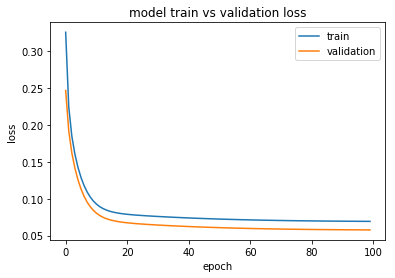

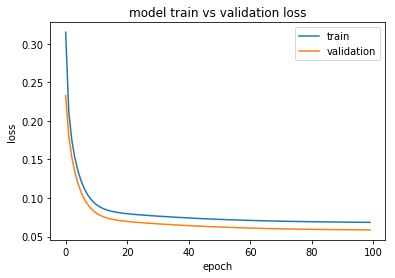

In [63]:
# summarize history for loss
import matplotlib.pyplot as plt

plt.plot(history_train_with_train.history['loss'][:])
plt.plot(history_train_with_train.history['val_loss'][:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history_train_with_train_25.history['loss'][:])
plt.plot(history_train_with_train_25.history['val_loss'][:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename= 'image.gv', title= 'MyNeural Network')

<b> <u> Step 11 : Creating new senetences using Markov chain </b> </u>

In [139]:
# step 10 : now we will generate new lyrics using markov chain by creating a markov_text object, which would be used to make sentences later
import markovify
markov_text = markovify.NewlineText(rap_song_file)

In [140]:
def generate_lyrics():
    bars_new_lyrics = []
    last_words = []
    lyriclength = len(bars)
    count = 0
    #markov_model = markov_text((". ").join('songs.txt') + ".")

    while len(bars_new_lyrics) < lyriclength / 9 and count < lyriclength * 2:
        # By default, the make_sentence method tries, a maximum of 10 times per invocation,
        # to make a sentence that doesn't overlap too much with the original text.
        # If it is successful, the method returns the sentence as a string.
        # If not, it returns None. (https://github.com/jsvine/markovify)
        bar = markov_text.make_sentence()
        #print(bar)
        # make sure the bar isn't 'None' and that the amount of
        # syllables is under the max syllables
        if type(bar) != type(None) and find_syllables_count(bar) < 1:

            # function to get the last word of the bar
            def get_last_word(bar):
                last_word = bar.split(" ")[-1]
                # if the last word is punctuation, get the word before it
                if last_word[-1] in "!.?,":
                    last_word = last_word[:-1]
                return last_word

            last_word = get_last_word(bar)
            # only use the bar if it is unique and the last_word
            # has only been seen less than 3 times
            if bar not in bars_new_lyrics and last_words.count(last_word) < 3:
                bars_new_lyrics.append(bar)
                last_words.append(last_word)
                count += 1

    return bars_new_lyrics

In [141]:
bars_new_lyrics = generate_lyrics()

In [143]:

new_bars = []
for bar in bars_new_lyrics:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars_new_lyrics = new_bars

In [144]:
print(len(bars_new_lyrics))

1945


#### ----------------completed-----------------------------------------

In [146]:
rhyming_list_final_new_lyrics = rhyming_list_all(bars_new_lyrics)

In [147]:
rhyming_list_final_new_lyrics[:10]

['a', 'ea', 'ga', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'ra']

In [148]:
print(len(rhyming_list_final_new_lyrics))

189


In [169]:
import random
def compose_rap(lines, rhyming_list_final_new_lyrics, model):
    rap_vectors = []
    human_lyrics = bars
    
    # choose a random line to start in from given lyrics
    initial_index = random.choice(range(len(human_lyrics) - 1))
    # create an initial_lines list consisting of 2 lines
    initial_lines = human_lyrics[initial_index:initial_index + 8]
    print(initial_lines)
    #print(initial_lines)
    starting_input = []
    for line in initial_lines:
        # appends a [syllable, rhyme_index] pair to starting_input
        #print(line)
        starting_input.append([find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final_new_lyrics,line)])
    # predict generates output predictions for the given samples
    # it's reshaped as a (1, 2, 2) so that the model can predict each
    # 2x2 matrix of [syllable, rhyme_index] pairs
    print(starting_input)
    starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(4, 2,2))
    #starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(2, 2, 4))
    rap_vectors.append(starting_vectors)
    print(starting_vectors)
    for i in range(20):
        rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(4,2,2)))
        #rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(2, 2, 4)))
    return rap_vectors

In [177]:
a = [[5.05, 0.922229], [0.25, 0.6455026455026455], [9999.5, 0.21164021164021163], [0.625, 0.21164021164021163], [0.625, 0.10582010582010581], [0.8125, 0.20105820105820105], [0.4, 0.2], [0.1, 0.1]]
(model.predict(np.array([a]).flatten().reshape(4,2,2)))

array([[[0.6677761 , 0.46421334],
        [0.70928895, 0.5220963 ]],

       [[0.6677867 , 0.46421364],
        [0.7092974 , 0.5221197 ]],

       [[0.66776997, 0.46422145],
        [0.70929486, 0.52213573]],

       [[0.6677779 , 0.46421763],
        [0.70932287, 0.5221247 ]]], dtype=float32)

In [170]:
rap_generated_with_prediction = compose_rap(bars_new_lyrics, rhyming_list_final_new_lyrics, model)

['and you cant get in without yo gold card you got', 'to be a player', 'now you know a place where', 'you gots to be and i took you there', 'pop goes the nine well go right behind', 'you can slide off your shoes sit back and recline', 'yeah', 'vision  kilos of cocaine smackdead in your face']
[[0.75, 0.8253968253968254], [0.25, 0.6455026455026455], [0.5, 0.21164021164021163], [0.625, 0.21164021164021163], [0.625, 0.10582010582010581], [0.8125, 0.20105820105820105], [0.0625, 0.30158730158730157], [0.875, 0.14814814814814814]]
[[[0.6677796  0.46421644]
  [0.7093291  0.5221089 ]]

 [[0.6677753  0.46421883]
  [0.70930874 0.5221282 ]]

 [[0.66776997 0.46422145]
  [0.70929486 0.52213573]]

 [[0.6677897  0.46421173]
  [0.7093335  0.5221127 ]]]


In [162]:
rap_generated_with_prediction

[array([[[0.6677803 , 0.46421608],
         [0.70932233, 0.5221121 ]],
 
        [[0.66777825, 0.46421704],
         [0.7093187 , 0.5221134 ]],
 
        [[0.6677745 , 0.46421903],
         [0.7093099 , 0.522119  ]],
 
        [[0.66777045, 0.4642211 ],
         [0.70930564, 0.5221287 ]]], dtype=float32),
 array([[[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
        [[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
        [[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
        [[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]]], dtype=float32),
 array([[[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
        [[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
        [[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
        [[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]]], dtype=float32),
 array([[[0.6677753 , 0.46421862],
         [0.70931107, 0.522122  ]],
 
      

In [117]:
def vectors_into_song(vectors, generated_lyrics, rhyme_list):
    print ("\n\n")
    print("About to write rap (this could take a moment)...")
    print ("\n\n")

    # compare the last words to see if they are the same, if they are
    # increment a penalty variable which grants penalty points for being
    # uncreative
    def last_word_compare(rap, line2):
        penalty = 0
        for line1 in rap:
            word1 = line1.split(" ")[-1]
            word2 = line2.split(" ")[-1]

            # remove any punctuation from the words
            while word1[-1] in "?!,. ":
                word1 = word1[:-1]

            while word2[-1] in "?!,. ":
                word2 = word2[:-1]

            if word1 == word2:
                penalty += 0.2

        return penalty

    # vector_half is a single [syllable, rhyme_index] pair
    # returns a score rating for a given line
    def calculate_score(vector_half, syllables, rhyme, penalty):
        desired_syllables = vector_half[0]
        desired_rhyme = vector_half[1]
        # desired_syllables is the number of syllables we want
        desired_syllables = desired_syllables * maxsyllables
        # desired rhyme is the index of the rhyme we want
        desired_rhyme = desired_rhyme * len(rhyme_list)

        # generate a score by subtracting from 1 the sum of the difference between
        # predicted syllables and generated syllables and the difference between
        # the predicted rhyme and generated rhyme and then subtract the penalty
        score = 1.0 - (abs((float(desired_syllables) - float(syllables))) + abs(
            (float(desired_rhyme) - float(rhyme)))) - penalty

        return score

    # generated a list of all the lines from generated_lyrics with their
    # line, syllables, and rhyme float value
    dataset = []
    for line in generated_lyrics:
    
        line_list = [line, find_syllables_count(line), index_rhyming_word_to_float(rhyme_list,line)]
        dataset.append(line_list)

    rap = []

    vector_halves = []
    for vector in vectors:
        # vectors are the 2x2 rap_vectors (predicted bars) generated by compose_rap()
        # separate every vector into a half (essentially one bar) where each
        # has a pair of [syllables, rhyme_index]
        vector_halves.append(list(vector[0][0]))
        vector_halves.append(list(vector[0][1]))

    for vector in vector_halves:
        # Each vector (predicted bars) is scored against every generated bar ('item' below)
        # to find the generated bar that best matches (highest score) the vector predicted
        # by the model. This bar is then added to the final rap and also removed from the
        # generated lyrics (dataset) so that we don't get duplicate lines in the final rap.
        scorelist = []
        for item in dataset:
            # item is one of the generated bars from the Markov model
            line = item[0]

            if len(rap) != 0:
                penalty = last_word_compare(rap, line)
            else:
                penalty = 0
            # calculate the score of the current line
            total_score = calculate_score(vector, item[1], item[2], penalty)
            score_entry = [line, total_score]
            # add the score of the current line to a scorelist
            scorelist.append(score_entry)

        fixed_score_list = []
        for score in scorelist:
            fixed_score_list.append(float(score[1]))
        # get the line with the max valued score from the fixed_score_list
        max_score = max(fixed_score_list)
        for item in scorelist:
            if item[1] == max_score:
                # append item[0] (the line) to the rap
                rap.append(item[0])
                print(str(item[0]))

                # remove the line we added to the rap so
                # it doesn't get chosen again
                for i in dataset:
                    if item[0] == i[0]:
                        dataset.remove(i)
                        break
                break
    return rap


In [118]:
vectors_into_song(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics)




About to write rap (this could take a moment)...



stop running up my money on my money and my man smallz


IndexError: string index out of range